In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/Users/anishsoni/Desktop/Job_Oppurtunity/job.csv')

In [3]:
data.head()

,job_title,company_name,location,start_date,ctc,experience,posted
0,Business Development Associate,Break The Code,Mumbai,Starts Immediately,"₹ 2,00,000 - 3,00,000",0-1 years,3 days ago
1,IELTS/PTE/Spoken English Trainer,DePioneer Education Overseas,Delhi,Starts Immediately,"₹ 3,00,000 - 3,50,000",0-2 years,1 week ago
2,Fashion Designer,Valkyre Clothing,Mumbai,Starts Immediately,"₹ 3,00,000 - 3,50,000",0-2 years,3 days ago\n\n\nBe an early applicant
3,Corporate Sales Executive,Kompass India Information Private Limited,Mumbai,Starts Immediately,"₹ 2,00,000 - 4,00,000",0-5 years,3 weeks ago
4,Junior Python Developer,Extension Technologies Private Limited,Faridabad,Starts Immediately,"₹ 2,40,000 - 3,60,000",0-2 years,2 weeks ago


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4596 entries, 0 to 4595
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     4596 non-null   object
 1   company_name  4596 non-null   object
 2   location      4596 non-null   object
 3   start_date    4596 non-null   object
 4   ctc           4596 non-null   object
 5   experience    4596 non-null   object
 6   posted        4596 non-null   object
dtypes: object(7)
memory usage: 251.5+ KB


In [6]:
data['posted'].value_counts()

3 weeks ago                                 1326
1 week ago                                  1031
2 weeks ago                                  936
3 days ago                                   198
2 days ago                                   138
4 days ago                                   109
6 days ago                                   100
5 days ago                                    98
1 week ago\n\n\nBe an early applicant         84
3 weeks ago\n\n\nBe an early applicant        81
2 weeks ago\n\n\nBe an early applicant        78
1 day ago                                     74
Few hours ago                                 60
2 days ago\n\n\nBe an early applicant         49
3 days ago\n\n\nBe an early applicant         46
1 day ago\n\n\nBe an early applicant          29
4 days ago\n\n\nBe an early applicant         26
Just now\n\n\nBe an early applicant           26
Few hours ago\n\n\nBe an early applicant      23
Today                                         19
Today\n\n\nBe an ear

## Cleaning the data

In [11]:
data['posted'] = data['posted'].str.replace("\n\n\nBe an early applicant", " ")
data['min_ctc'] = data['ctc'].str.split("-").str[0].str.strip().str.replace("₹", "").str.replace(",", "")
data["max_ctc"] = data["ctc"].str.split("-").str[-1].str.strip().str.replace("₹", "").str.replace(",", "")
data[["min_ctc", "max_ctc"]] = data[["min_ctc", "max_ctc"]].apply(pd.to_numeric, errors='coerce')

In [12]:
data.sample(5)

,job_title,company_name,location,start_date,ctc,experience,posted,min_ctc,max_ctc
2142,iOS App Developer,Buddha Education Association Incorporation,Work from home,Starts Immediately,"₹ 5,00,000",0-5 years,1 week ago,500000.0,500000.0
2934,Presales Executive,Birdvision Consulting Private Limited,Pune,Starts Immediately,"₹ 2,00,000 - 2,60,000",0-2 years,2 weeks ago,200000.0,260000.0
853,Junior Operations Manager,Documitra,Ajmer,Starts Immediately,"₹ 2,00,000 - 2,50,000",0-2 years,3 days ago,200000.0,250000.0
1196,UI Designer,Future Skills,Hyderabad,Starts Immediately,"₹ 3,00,000 - 5,00,000",0-5 years,1 week ago,300000.0,500000.0
2583,Data Entry Executive,A1 Advance,"Chennai, Coimbatore, Madurai, Puducherry, Siva...",Starts Immediately,"₹ 3,00,000 - 6,00,000",0-5 years,2 weeks ago,300000.0,600000.0


In [14]:
data['experience'] = data['experience'].str.replace('years','')
data['min_experience'] = data['experience'].str.split('-').str[0].str.strip()
data['max_experience'] = data['experience'].str.split('-').str[-1].str.strip()
data[["min_experience", "max_experience"]] = data[["min_experience", "max_experience"]].apply(pd.to_numeric, errors='coerce')

In [16]:
data.sample(5)

,job_title,company_name,location,start_date,ctc,experience,posted,min_ctc,max_ctc,min_experience,max_experience
3804,Business Development Manager,"Haiden (Mumbai, India)","Ranchi, Bangalore, Mumbai, Jaipur, Srinagar, B...",Starts Immediately,"₹ 2,00,000 - 7,00,000",0-5,3 weeks ago,200000.0,700000.0,0.0,5.0
4218,Field Sales Executive,Piegon Media Pvt Ltd,Chandigarh,Starts Immediately,"₹ 2,16,000 - 3,00,000",1-3,2 weeks ago,216000.0,300000.0,1.0,3.0
260,Social Media Manager,Error Technologies,Hyderabad,Starts Immediately,"₹ 2,00,000 - 3,00,000",1-4,3 days ago,200000.0,300000.0,1.0,4.0
728,Career Counselor,DGguru Learning Solutions Private Limited (Men...,Noida,Starts Immediately,"₹ 3,00,000 - 4,00,000",1-3,2 weeks ago,300000.0,400000.0,1.0,3.0
2237,Finance Executive,A1 Advance,"Ballari, Kalaburagi, Koppal, Mangaluru, Vijaya...",Starts Immediately,"₹ 4,00,000 - 6,00,000",0-5,1 week ago,400000.0,600000.0,0.0,5.0


In [17]:
data['posted'].value_counts()

3 weeks ago       1326
1 week ago        1031
2 weeks ago        936
3 days ago         198
2 days ago         138
4 days ago         109
6 days ago         100
5 days ago          98
1 week ago          84
3 weeks ago         81
2 weeks ago         78
1 day ago           74
Few hours ago       60
2 days ago          49
3 days ago          46
1 day ago           29
4 days ago          26
Just now            26
Few hours ago       23
Today               19
Today               18
7 days ago          14
5 days ago          13
Just now            10
7 days ago           6
6 days ago           4
Name: posted, dtype: int64

In [19]:
def convert_to_days(posted):
    if 'week' in posted:
        return int(posted.split()[0]*7)
    elif 'days' in posted:
        return int(posted.split()[0])
    elif 'hour' in posted or 'Just now' in posted or 'Few hours ago' in posted or 'Today' in posted:
        return 0

data['posted'] = data['posted'].apply(convert_to_days)


In [20]:
data.sample(5)

,job_title,company_name,location,start_date,ctc,experience,posted,min_ctc,max_ctc,min_experience,max_experience
2567,Senior Consultant - Recruitment,FyndBridge Consulting Services,Work from home,Starts Immediately,"₹ 2,00,000 - 4,00,000",0-2,2222222.0,200000.0,400000.0,0.0,2.0
1556,Business Development Associate,Moneyfrog Financial Services Private Limited,Mumbai,Starts Immediately,"₹ 2,00,000",0-2,3.0,200000.0,200000.0,0.0,2.0
4022,Backend Developer,Huemn,Hyderabad,Starts Immediately,"₹ 9,00,000 - 10,00,000",1-3,3.0,900000.0,1000000.0,1.0,3.0
1143,Graphic Designer,Pixel'O'Media,Jaipur,Starts Immediately,"₹ 2,04,000 - 2,76,000",0-2,2222222.0,204000.0,276000.0,0.0,2.0
790,Chemical Engineer,Primary Healthtech,Guwahati,Starts Immediately,"₹ 2,00,000 - 3,00,000",0-1,3333333.0,200000.0,300000.0,0.0,1.0


In [21]:
data.sample(5)

,job_title,company_name,location,start_date,ctc,experience,posted,min_ctc,max_ctc,min_experience,max_experience
775,Inside Sales Executive,Sanver E-Solutions Private Limited,Mumbai,Starts Immediately,"₹ 3,60,000 - 6,00,000",1-3,3333333.0,360000.0,600000.0,1.0,3.0
2405,Sales And Marketing Associate,Rajbala Educational Institution Private Limited,Delhi,Starts Immediately,"₹ 4,50,000",0-2,1111111.0,450000.0,450000.0,0.0,2.0
1548,Junior Operations Executive,GLC Wealth Advisor,Delhi,Starts Immediately,"₹ 2,00,000 - 3,50,000",0-2,3.0,200000.0,350000.0,0.0,2.0
1313,Business Development (Sales) Executive,HealthMobis Innovations,Pimpri-Chinchwad,Starts Immediately,"₹ 5,00,000 - 8,00,000",0-5,3333333.0,500000.0,800000.0,0.0,5.0
2577,Office Assistant,A1 Advance,"Amravati, Parbhani, Satara, Nagpur, Nashik, Au...",Starts Immediately,"₹ 5,00,000 - 7,00,000",0-5,2222222.0,500000.0,700000.0,0.0,5.0


## Exploratory Data Analysis (EDA)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

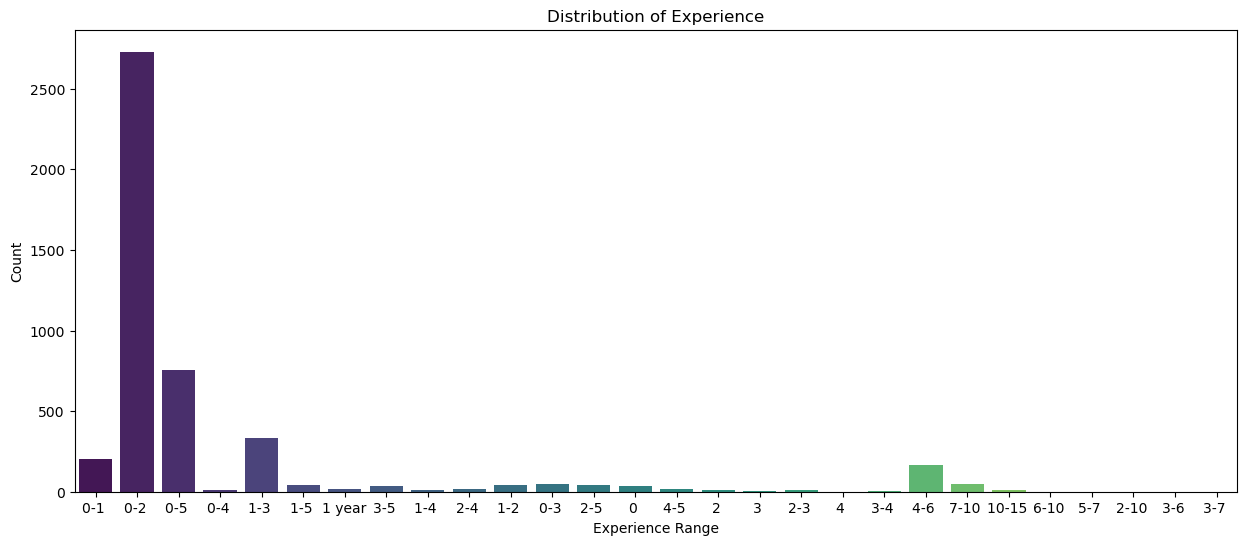

In [25]:
# Distribution of Experience
plt.figure(figsize = (15,6))
sns.countplot(x='experience' , data=data, palette = 'viridis')
plt.title('Distribution of Experience')
plt.xlabel('Experience Range')
plt.ylabel('Count')
plt.show()

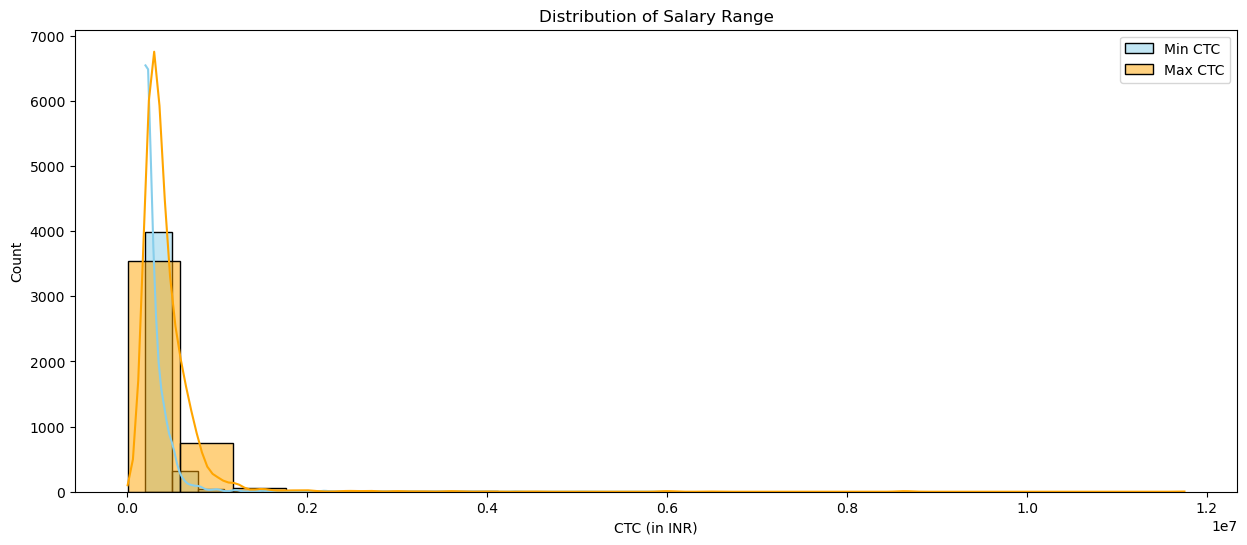

In [28]:
# Distribution of Salary Range
plt.figure(figsize =(15,6))
sns.histplot(data=data, x='min_ctc', bins =20, kde=True ,color= 'skyblue', label='Min CTC')
sns.histplot(data=data, x='max_ctc', bins =20, kde=True ,color= 'orange', label='Max CTC')
plt.title('Distribution of Salary Range')
plt.xlabel('CTC (in INR)')
plt.ylabel('Count')
plt.legend()
plt.show()

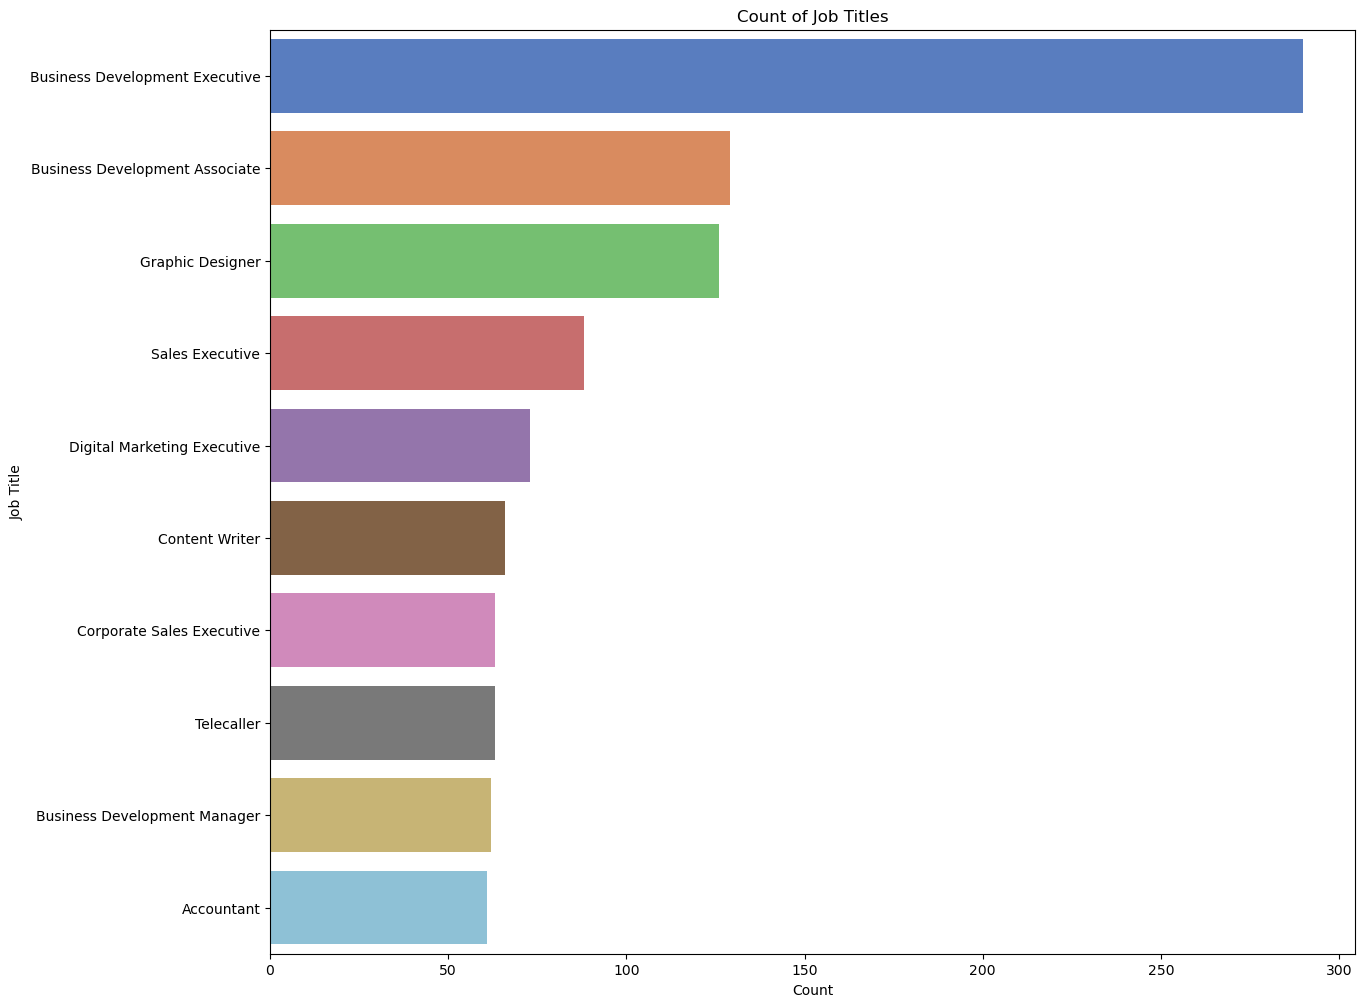

In [37]:
# Count of Job Titles

top_10_titles = data['job_title'].value_counts().head(10)
plt.figure(figsize = (14,12))
sns.countplot(y='job_title', data=data, palette = 'muted', order= top_10_titles.index)
plt.title('Count of Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

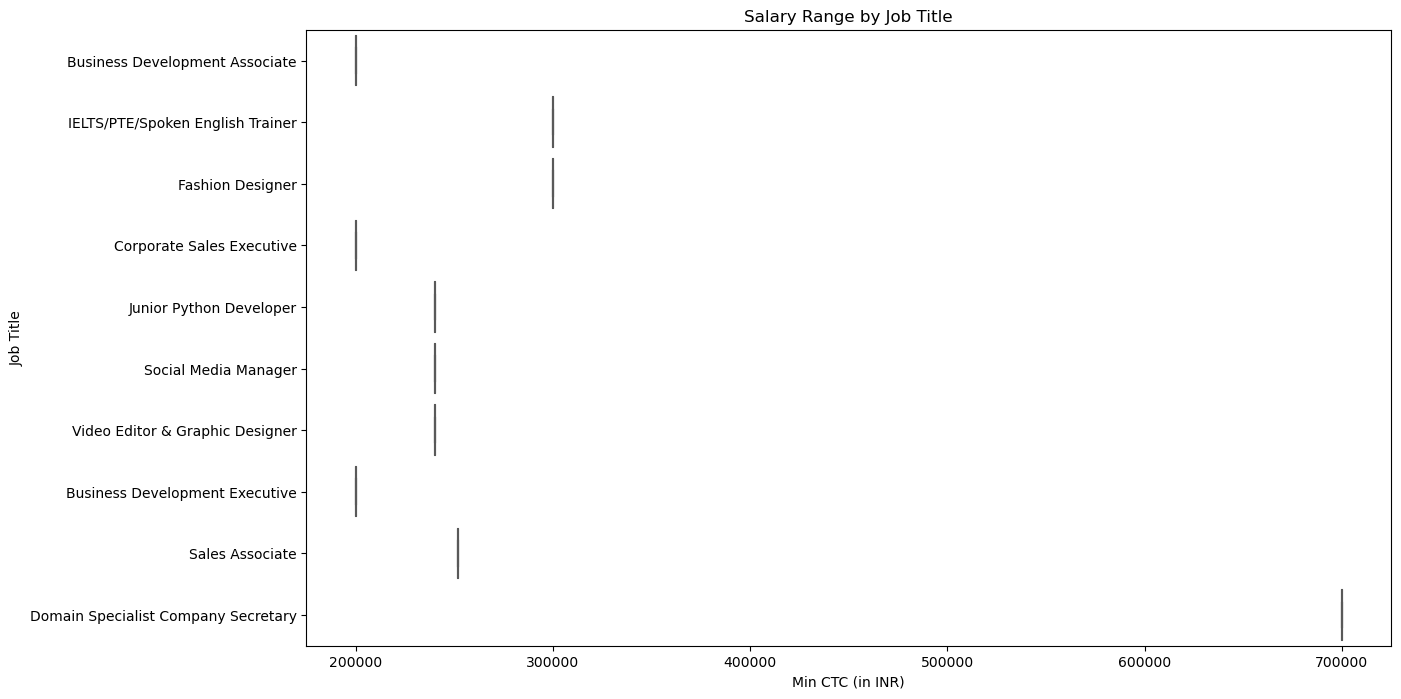

In [38]:
# Box Plot for Salary Range by Job Title
plt.figure(figsize =(14,8))
sns.boxplot(x='min_ctc', y='job_title', data=data[:10], palette= 'Set2')
plt.title('Salary Range by Job Title')
plt.xlabel('Min CTC (in INR)')
plt.ylabel('Job Title')
plt.show()

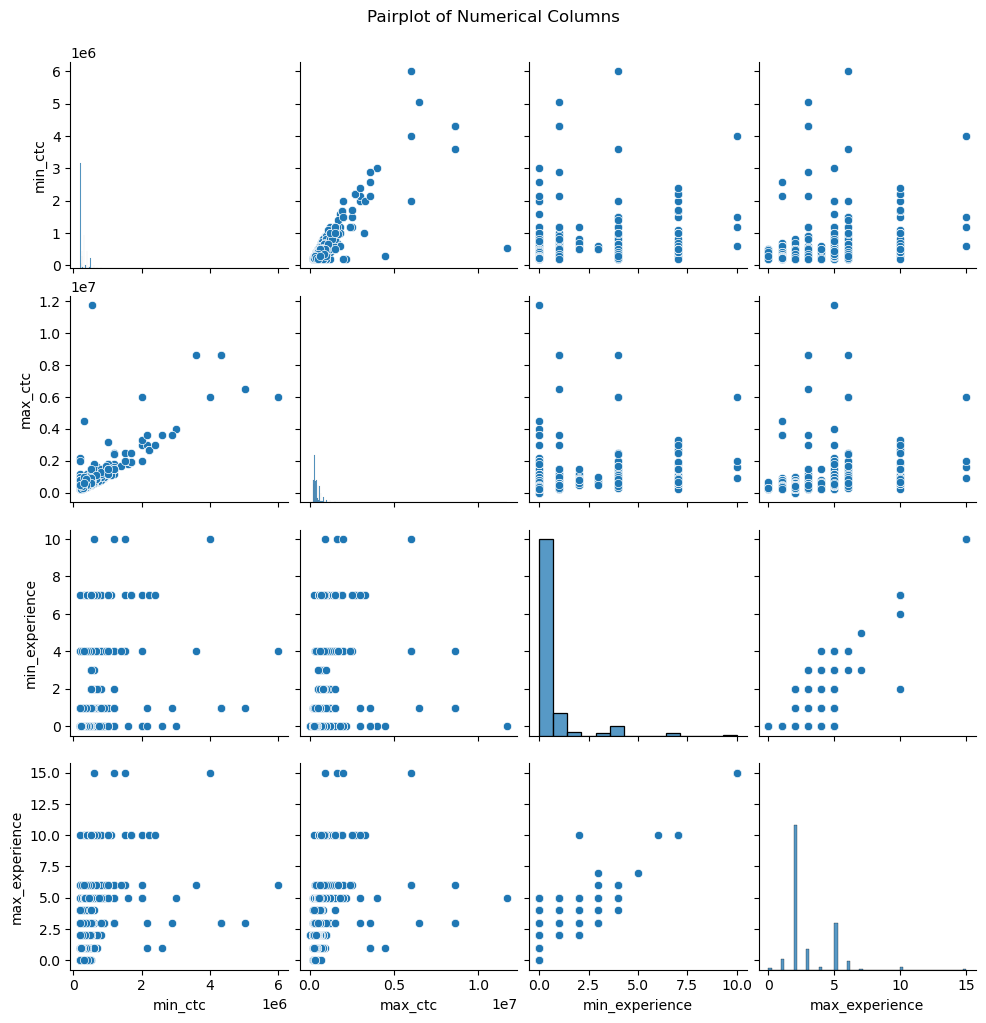

In [42]:
#Pairplot for numerical columns
sns.pairplot(data[['min_ctc', 'max_ctc', 'min_experience', 'max_experience']])
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()